# Tutorial 1 Homework Task (1.5 Marks)

This task is based on Flights data  which comes a part of nycflights13 library. Read about data from the following sources:

https://pypi.org/project/nycflights13/

https://github.com/tidyverse/nycflights13

### <span style="color:red">IMPORTANT:</span> You need to study and understand your data very carefully before answering the questions.

### Data Acquisition

In [1]:
!pip install nycflights13


In [2]:
from nycflights13 import flights
from nycflights13 import weather
from nycflights13 import airports
from nycflights13 import planes
from nycflights13 import airlines
import pandas as pd
#printing first two rows from flights data
#print(flights.head(2))
#getting only required fields/columns from flights in your dataframe

flight_data=flights[['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay', 'hour', 'minute']].copy()
#print('flight data')
print(flight_data.head(2))
#flight_data.info()


   year  month  day  dep_time  sched_dep_time  dep_delay  hour  minute
0  2013      1    1     517.0             515        2.0     5      15
1  2013      1    1     533.0             529        4.0     5      29


### <span style="color:red">Tutorial Exercise</span>


In this excercise, you need to do following:

a) Using a bar graph, find out which month has the maximum number of actual delayed flights.


b) It can be noticed from the data, there is no schedule departure date column in the data. The date information is distributed in multiple columns such as year, month, day, hour and minute. This limits ability to analyse this data as time series. Write python code to create a column called schedule_dep_date using to_datetime() function. Write also a python code to plot a line graph to see how departure delay time of actual delayed flight varies over time. 
Note: You may read more about to_datetime() function in Pandas from here: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html






###### <span style="color:red">Submission: </span> Mylo Assignment Box (Tutorial Task)
###### <span style="color:red">Submission Deadline: </span> within 5 Days of your Tutorial

### Preprocessing Steps

#### Answer to (a)

In [3]:

#flight_data['month']=flight_data['month'].sort_values()

#data cleaning
flight_data = flight_data.dropna(axis=0)
flight_data.info()
#filtering data to get only actual delayed flight
flight_cleaned=flight_data[flight_data["dep_delay"]>0].copy()
#print(flight_data.info())
print(flight_cleaned.info())

flight_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 328521 entries, 0 to 336769
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            328521 non-null  int64  
 1   month           328521 non-null  int64  
 2   day             328521 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  328521 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   hour            328521 non-null  int64  
 7   minute          328521 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 22.6 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 128432 entries, 0 to 336768
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            128432 non-null  int64  
 1   month           128432 non-null  int64  
 2   day             128432 non-null  int64  
 3   dep_time        128432 non-null  f

,year,month,day,dep_time,sched_dep_time,dep_delay,hour,minute
0,2013,1,1,517.0,515,2.0,5,15
1,2013,1,1,533.0,529,4.0,5,29
2,2013,1,1,542.0,540,2.0,5,40
19,2013,1,1,601.0,600,1.0,6,0
25,2013,1,1,608.0,600,8.0,6,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 128432 entries, 0 to 336768
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            128432 non-null  int64  
 1   month           128432 non-null  object 
 2   day             128432 non-null  int64  
 3   dep_time        128432 non-null  float64
 4   sched_dep_time  128432 non-null  int64  
 5   dep_delay       128432 non-null  float64
 6   hour            128432 non-null  int64  
 7   minute          128432 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 8.8+ MB


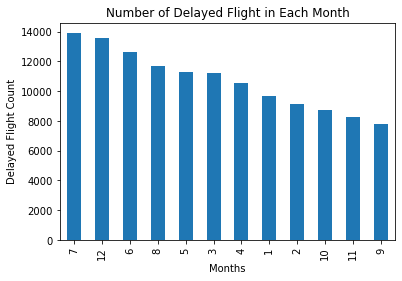

In [5]:
#converting month column to string so that we can plot bar graph
flight_cleaned['month']=flight_cleaned['month'].astype(str)
#check datatype
flight_cleaned.info()

flight_cleaned['month'].value_counts().plot(kind='bar')

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.title('Number of Delayed Flight in Each Month') # add a title to the histogram
plt.ylabel('Delayed Flight Count') # add y-label
plt.xlabel('Months') # add x-label

#from matplotlib.dates import DateFormatter

plt.show()




#### Answer to (b)

In [6]:
#creating schedule dep date column
flight_cleaned['schedule_dep_date']=pd.to_datetime(flight_cleaned[['year','month','day','hour','minute']])
flight_cleaned.head()
#dropping duplicates. There are several ways to do it. I have used simplest of the methods
flight_cleaned=flight_cleaned.drop_duplicates(subset=['schedule_dep_date'])
#checking whether duplicates are removed or not
duplicateRowsDF = flight_cleaned[flight_cleaned.duplicated(['schedule_dep_date'])]
print("Duplicate Rows based on a single column are:", duplicateRowsDF, sep='\n')


Duplicate Rows based on a single column are:
Empty DataFrame
Columns: [year, month, day, dep_time, sched_dep_time, dep_delay, hour, minute, schedule_dep_date]
Index: []


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


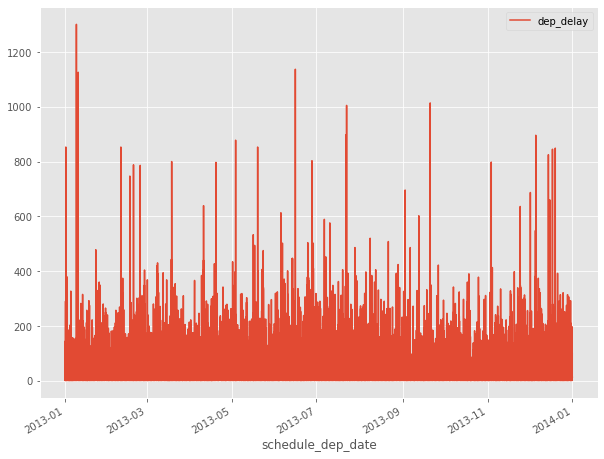

In [7]:

#plotting the timeseries

import matplotlib as mpl
import matplotlib.pyplot as plt
#select style of your graphs
print(plt.style.available)
mpl.style.use(['ggplot']) 


#start plotting
ax=flight_cleaned.plot.line(x='schedule_dep_date', y='dep_delay', figsize=(10, 8))

#plt.title('Environment')
#plt.ylabel('Ozone')
#plt.xlabel('Day')

#date_form = DateFormatter("%m")
#ax.xaxis.set_major_formatter(date_form)

plt.show()

#ax1 = flight_data.plot.scatter(x='schedule_dep_date',y='dep_delay',c='DarkBlue')